In [1]:
import geopandas as gpd
import os
import matplotlib

# Roteiro

- Abrindo e Salvando ShapefiLes
- Utilizando LOC
- Utilizando ILOC
- Filtro NP.WHERE

# Abrindo e Salvando Shapefiles

In [2]:
# get actual foder path + data file path
path = os.getcwd() + '/dados/municipios.shp'

# read file
data = gpd.read_file(path)

<AxesSubplot:>

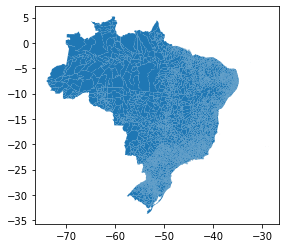

In [3]:
data.plot()

In [4]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [5]:
# show GeodataFrame
data.head()

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
0,1,1,5100102,Acorizal,MT,Centro-Oeste,None,"POLYGON ((-56.28986 -15.23886, -56.28991 -15.2..."
1,2,104,5107156,Reserva Do Cabaçal,MT,Centro-Oeste,None,"POLYGON ((-58.50758 -15.00500, -58.72273 -15.0..."
2,3,144,5200100,Abadiânia,GO,Centro-Oeste,None,"POLYGON ((-48.91412 -16.08702, -48.91283 -16.0..."
3,4,147,5200175,Água Fria De Goiás,GO,Centro-Oeste,None,"POLYGON ((-47.85740 -14.76522, -47.85657 -14.7..."
4,5,160,5201306,Anicuns,GO,Centro-Oeste,None,"POLYGON ((-49.98332 -16.32660, -49.98259 -16.3..."


In [6]:
# sistema de referecia de coordenada
data.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - SIRGAS 2000 by country
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
# fitrar por linha 0-2
filtro = data[:4]
filtro

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
0,1,1,5100102,Acorizal,MT,Centro-Oeste,None,"POLYGON ((-56.28986 -15.23886, -56.28991 -15.2..."
1,2,104,5107156,Reserva Do Cabaçal,MT,Centro-Oeste,None,"POLYGON ((-58.50758 -15.00500, -58.72273 -15.0..."
2,3,144,5200100,Abadiânia,GO,Centro-Oeste,None,"POLYGON ((-48.91412 -16.08702, -48.91283 -16.0..."
3,4,147,5200175,Água Fria De Goiás,GO,Centro-Oeste,None,"POLYGON ((-47.85740 -14.76522, -47.85657 -14.7..."


In [8]:
# salvando novo shapefile em novo arquivo
path_out = os.getcwd() + '/dados/municipios_filter.shp'
filtro.to_file(path_out)

<AxesSubplot:>

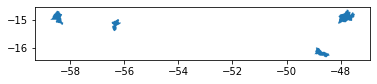

In [9]:
# abrindo novo shapefile e plotando
data_filter = gpd.read_file(path_out)
data_filter.plot()

# Utiizando LOC

In [10]:
# utilizando loc
# loc: tem cm referencia linha e coluna
data.loc[:10,:'uf']

,id,id_pk,geocodigo,municipio,uf
0,1,1,5100102,Acorizal,MT
1,2,104,5107156,Reserva Do Cabaçal,MT
2,3,144,5200100,Abadiânia,GO
3,4,147,5200175,Água Fria De Goiás,GO
4,5,160,5201306,Anicuns,GO
5,6,157,5200902,Amorinópolis,GO
6,7,357,5219803,São Domingos,GO
7,8,358,5219902,São Francisco De Goiás,GO
8,9,163,5201504,Aporé,GO
9,10,172,5203104,Baliza,GO


In [11]:
# pandas series
print(type(data.loc[2]))
data.loc[2]

<class 'pandas.core.series.Series'>


id                                                           3
id_pk                                                      144
geocodigo                                              5200100
municipio                                            Abadiânia
uf                                                          GO
regiao                                            Centro-Oeste
area                                                      None
geometry     POLYGON ((-48.91412123317579 -16.0870191010398...
Name: 2, dtype: object

In [12]:
# filtros por id
data['id'] > 6125

0       False
1       False
2       False
3       False
4       False
        ...  
6124    False
6125     True
6126     True
6127     True
6128     True
Name: id, Length: 6129, dtype: bool

In [13]:
# filtros por id
filtro_id = data['id'] > 6125
data.loc[filtro_id]

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
6125,6126,6121,4128500,Wenceslau Braz,PR,Sul,None,"POLYGON ((-49.79156 -23.73905, -49.79150 -23.7..."
6126,6127,6123,4128559,Vera Cruz Do Oeste,PR,Sul,None,"POLYGON ((-53.87662 -24.99329, -53.87627 -24.9..."
6127,6128,6125,4128625,Alto Paraíso,PR,Sul,None,"POLYGON ((-53.79019 -23.37994, -53.78410 -23.3..."
6128,6129,6128,4128708,Vitorino,PR,Sul,None,"POLYGON ((-52.86974 -26.22005, -52.86972 -26.2..."


In [14]:
# filtros por id e cod
# operadores no geopandas sao diferentes
# and - &
# or  - |
# ...
filtro_id = (data['id'] > 6125) & (data['geocodigo'] == '4128500')
data.loc[filtro_id]

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
6125,6126,6121,4128500,Wenceslau Braz,PR,Sul,None,"POLYGON ((-49.79156 -23.73905, -49.79150 -23.7..."


In [17]:
# atualizando todas as linhas da coluna area
data['area'] = data.loc[:, 'geometry'].area
data

<ipython-input-17-eb197464e177>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data['area'] = data.loc[:, 'geometry'].area


,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
0,1,1,5100102,Acorizal,MT,Centro-Oeste,0.070693,"POLYGON ((-56.28986 -15.23886, -56.28991 -15.2..."
1,2,104,5107156,Reserva Do Cabaçal,MT,Centro-Oeste,0.112314,"POLYGON ((-58.50758 -15.00500, -58.72273 -15.0..."
2,3,144,5200100,Abadiânia,GO,Centro-Oeste,0.088319,"POLYGON ((-48.91412 -16.08702, -48.91283 -16.0..."
3,4,147,5200175,Água Fria De Goiás,GO,Centro-Oeste,0.170463,"POLYGON ((-47.85740 -14.76522, -47.85657 -14.7..."
4,5,160,5201306,Anicuns,GO,Centro-Oeste,0.082837,"POLYGON ((-49.98332 -16.32660, -49.98259 -16.3..."
...,...,...,...,...,...,...,...,...
6124,6125,6120,4128401,Uraí,PR,Sul,0.020978,"POLYGON ((-50.89000 -23.14711, -50.87139 -23.1..."
6125,6126,6121,4128500,Wenceslau Braz,PR,Sul,0.035269,"POLYGON ((-49.79156 -23.73905, -49.79150 -23.7..."
6126,6127,6123,4128559,Vera Cruz Do Oeste,PR,Sul,0.029250,"POLYGON ((-53.87662 -24.99329, -53.87627 -24.9..."
6127,6128,6125,4128625,Alto Paraíso,PR,Sul,0.085576,"POLYGON ((-53.79019 -23.37994, -53.78410 -23.3..."


# Utilizando ILOC

In [16]:
# iloc trabalha somente com numeros
data.iloc[:4,:4]

,id,id_pk,geocodigo,municipio
0,1,1,5100102,Acorizal
1,2,104,5107156,Reserva Do Cabaçal
2,3,144,5200100,Abadiânia
3,4,147,5200175,Água Fria De Goiás


# Filtro NP.WHERE

In [18]:
# criando uma nova coluna, preenchendo valores com condição do np.where
import numpy as np
data['classe'] = np.where(data['area'] > 0.1, 1, 0)
data

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry,classe
0,1,1,5100102,Acorizal,MT,Centro-Oeste,0.070693,"POLYGON ((-56.28986 -15.23886, -56.28991 -15.2...",0
1,2,104,5107156,Reserva Do Cabaçal,MT,Centro-Oeste,0.112314,"POLYGON ((-58.50758 -15.00500, -58.72273 -15.0...",1
2,3,144,5200100,Abadiânia,GO,Centro-Oeste,0.088319,"POLYGON ((-48.91412 -16.08702, -48.91283 -16.0...",0
3,4,147,5200175,Água Fria De Goiás,GO,Centro-Oeste,0.170463,"POLYGON ((-47.85740 -14.76522, -47.85657 -14.7...",1
4,5,160,5201306,Anicuns,GO,Centro-Oeste,0.082837,"POLYGON ((-49.98332 -16.32660, -49.98259 -16.3...",0
...,...,...,...,...,...,...,...,...,...
6124,6125,6120,4128401,Uraí,PR,Sul,0.020978,"POLYGON ((-50.89000 -23.14711, -50.87139 -23.1...",0
6125,6126,6121,4128500,Wenceslau Braz,PR,Sul,0.035269,"POLYGON ((-49.79156 -23.73905, -49.79150 -23.7...",0
6126,6127,6123,4128559,Vera Cruz Do Oeste,PR,Sul,0.029250,"POLYGON ((-53.87662 -24.99329, -53.87627 -24.9...",0
6127,6128,6125,4128625,Alto Paraíso,PR,Sul,0.085576,"POLYGON ((-53.79019 -23.37994, -53.78410 -23.3...",0
